In [20]:
#19
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import sympy as sym
import math as m
from math import e
import matplotlib.pyplot as plt
sym.init_printing(use_unicode=True)
Td = 300
N0v = 300
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [21]:

import matplotlib.pyplot as plt
import numpy as np

def funcion(T,dT):
    return 1/2*(sym.tanh(sym.sqrt(x**2 + dT**2)*(Td/2*T))/sym.sqrt(x**2+dT**2))


#Utilizando gauss legendre




In [22]:
#Polinomio legendre
n = 50
def GetLegendre(n,x,y):
    
    y = (x**2 - 1)**n
    
    poly = sym.diff( y,x,n )/(2**n*np.math.factorial(n))
    
    return poly

polinomio = GetLegendre(50,x,y)
print(polinomio)

(140737488355328*x**50 + 86201711617638400*x**48*(x**2 - 1) + 12154441338087014400*x**46*(x**2 - 1)**2 + 698880376940003328000*x**44*(x**2 - 1)**3 + 20660651143288848384000*x**42*(x**2 - 1)**4 + 355776412687433969172480*x**40*(x**2 - 1)**5 + 3854244470780534666035200*x**38*(x**2 - 1)**6 + 27648304724068529287987200*x**36*(x**2 - 1)**7 + 136081499813774792589312000*x**34*(x**2 - 1)**8 + 471245193799553448411136000*x**32*(x**2 - 1)**9 + 1168688080622892552059617280*x**30*(x**2 - 1)**10 + 2100740971367596116305510400*x**28*(x**2 - 1)**11 + 2757222524919969902650982400*x**26*(x**2 - 1)**12 + 2651175504730740291010560000*x**24*(x**2 - 1)**13 + 1866643977820623266119680000*x**22*(x**2 - 1)**14 + 958210575281253276608102400*x**20*(x**2 - 1)**15 + 355585955670777583116288000*x**18*(x**2 - 1)**16 + 94125694148147007295488000*x**16*(x**2 - 1)**17 + 17430684101508705054720000*x**14*(x**2 - 1)**18 + 2196942178999019612160000*x**12*(x**2 - 1)**19 + 181247729767419118003200*x**10*(x**2 - 1)**20 + 92

C:\Users\Flutt\AppData\Local\Temp\ipykernel_30384\883359404.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  poly = sym.diff( y,x,n )/(2**n*np.math.factorial(n))


In [23]:
#Obtener raices
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn
    

def GetRoots(f,df,x,tolerancia = 10):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)

        if  type(root)!=bool:
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [45]:
Legendre = []
DLegendre = []

for i in range(n+1):
    Poly = GetLegendre(i,x,y)
    Legendre.append(Poly)
    DLegendre.append(sym.diff(Poly,x,1))
    

C:\Users\Flutt\AppData\Local\Temp\ipykernel_30384\883359404.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  poly = sym.diff( y,x,n )/(2**n*np.math.factorial(n))


KeyboardInterrupt: 

In [46]:
n = 50
def GetAllRoots(n,xn,Legendre,DLegendre):
    
    poly = sym.lambdify([x],Legendre[n],'numpy')
    Dpoly = sym.lambdify([x],DLegendre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)
    
    return Roots


In [47]:
Legendre

⎡                                                                2    ⎛       
⎢         2        ⎛   2    ⎞     4       2 ⎛ 2    ⎞     ⎛ 2    ⎞     ⎜   4   
⎢      3⋅x  - 1  x⋅⎝5⋅x  - 3⎠  8⋅x  + 24⋅x ⋅⎝x  - 1⎠ + 3⋅⎝x  - 1⎠   x⋅⎝8⋅x  + 
⎢1, x, ────────, ────────────, ───────────────────────────────────, ──────────
⎣         2           2                         8                             

                            2⎞                                          2     
    2 ⎛ 2    ⎞      ⎛ 2    ⎞ ⎟      6        4 ⎛ 2    ⎞       2 ⎛ 2    ⎞      
40⋅x ⋅⎝x  - 1⎠ + 15⋅⎝x  - 1⎠ ⎠  16⋅x  + 120⋅x ⋅⎝x  - 1⎠ + 90⋅x ⋅⎝x  - 1⎠  + 5⋅
──────────────────────────────, ──────────────────────────────────────────────
         8                                                 16                 

        3    ⎛                                         2              3⎞      
⎛ 2    ⎞     ⎜    6        4 ⎛ 2    ⎞        2 ⎛ 2    ⎞       ⎛ 2    ⎞ ⎟      
⎝x  - 1⎠   x⋅⎝16⋅x  + 168⋅x ⋅⎝x  - 1⎠ + 210⋅x ⋅⎝x 

In [48]:
DLegendre

⎡                                                                             
⎢               2                   ⎛ 2    ⎞                         ⎛     3  
⎢           15⋅x    3      3   15⋅x⋅⎝x  - 1⎠   4      2 ⎛ 2    ⎞   x⋅⎝112⋅x  +
⎢0, 1, 3⋅x, ───── - ─, 10⋅x  + ─────────────, x  + 5⋅x ⋅⎝x  - 1⎠ + ───────────
⎣             2     2                2                                        

                              2                                          2    
       ⎛ 2    ⎞⎞      ⎛ 2    ⎞                3 ⎛ 2    ⎞         ⎛ 2    ⎞     
 140⋅x⋅⎝x  - 1⎠⎠   15⋅⎝x  - 1⎠       5   105⋅x ⋅⎝x  - 1⎠   105⋅x⋅⎝x  - 1⎠    6
──────────────── + ────────────, 21⋅x  + ─────────────── + ───────────────, x 
  8                     8                       2                 8           

                                   2     ⎛                                    
       4 ⎛ 2    ⎞        2 ⎛ 2    ⎞      ⎜     5         3 ⎛ 2    ⎞         ⎛ 
   21⋅x ⋅⎝x  - 1⎠   105⋅x ⋅⎝x  - 1⎠    x⋅⎝432⋅x  +

In [55]:
xn = np.linspace(-1,1,100)

Roots1 = GetAllRoots(n,xn,Legendre,DLegendre)


IndexError: list index out of range

In [51]:
Roots1

NameError: name 'Roots1' is not defined

In [ ]:
#cargar los puntos
dT = 10**-4
funcion = funcion(Roots1,dT)
print(funcion)


NameError: name 'Roots1' is not defined

In [ ]:
#obetener pesos

def GetWeights(Roots,DLegendre):
    
    Dpoly = sym.lambdify([x],DLegendre[n],'numpy')
    Weights = 2/((1-Roots**2)*Dpoly(Roots)**2)
    
    return Weights

pesos = GetWeights(Roots1,DLegendre)

NameError: name 'Roots1' is not defined

In [ ]:
GetWeights(Roots1,DLegendre)

array([0.00290862, 0.01811556, 0.02178024, 0.02536067, 0.02884299,
       0.03221373, 0.03545984, 0.04940094, 0.0516557 , 0.05371062,
       0.05555774, 0.05718993, 0.05860085, 0.05978506, 0.06073797,
       0.0614559 , 0.06193607, 0.06217662, 0.06217662, 0.06193607,
       0.0614559 , 0.06073797, 0.05978506, 0.05860085, 0.05718993,
       0.05555774, 0.05371062, 0.0516557 , 0.04695505, 0.0443275 ,
       0.04152846, 0.03545984, 0.03221373, 0.02884299, 0.02536067,
       0.02178024, 0.01811556, 0.00290862])

In [44]:
#c
T= np.arange(1,20,10E-4)

#calcular integral
def funcion(T,dT):
    return 1/2*(sym.tanh(sym.sqrt(x**2 + dT**2)*(Td/2*T))/sym.sqrt(x**2+dT**2))


NOV = 0.03
dT= 10**-4
I = 0
for i in range(5):
    I += pesos[i]*funcion(Roots1[i],dT)
 
    

NameError: name 'pesos' is not defined

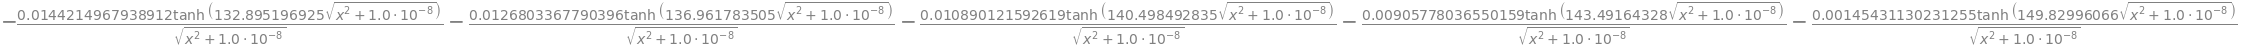

In [ ]:
I

In [58]:
#Criterio de parada

while np.abs(I-1/NOV) > dT:
    tc = I


In [60]:
I